# Finding Heavy Traffic Indicators on I-94

We are going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be; weather type, time of the day, time of the week, etc.

### Variables Table

The [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) has defined all the variables in the dataset as shown below.

|Variable|Description|
|--------|----------|
|holiday|US National holidays plus regional holiday, Minnesota State Fair|
|temp|Average temp in kelvin|
|rain_1h|Amount in mm of rain that occured in the hour|
|snow_1h|Amount in mm of snow that occured in the hour|
|clouds_all|Percentage of cloud cover|
|weather_main|Short textual description of the current weather|
|weather_description|Longer textual description of the current weather|
|date_time|Hour of the data collected in local CST time|
|traffic_volume|Hourly I-94 ATR 301 reported westbound traffic volume|

In [1]:
#Reading in the Metro_Interstate_Traffic_Volume csv using pandas
#Examine the first five rows

import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
#Examine the last five rows

i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
#Finding information about the dataset

i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


As per the information above, this dataset has 48204 rows and 9 columns. There are no null values in all the columns. The values in the columns index contain both numerical(integers and floats) and non-numeric (objects) data types.

The [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records _westbound_ traffic (cars moving from east to west).

### Analyzing Traffic Volume

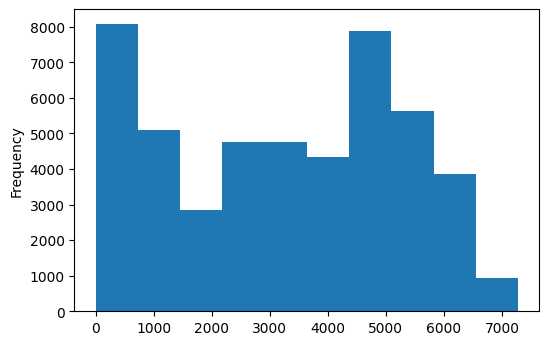

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The statistics above illustrates that the traffic volume varied between 0 to 7280 cars on an hourly basis between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 with an average of 3380 cars.

25% of the time shows that there were only 1193 of the cars that passed the station on an hourly basis and on the flip side, 75% of the time recorded a total of 4933 cars that passed the station on an hourly basis.

### Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts;

- Daytime date: hours from 7 a.m to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m to 7 a.m. (12 hours)

In [6]:
#Converting date_time variable to datetime
#Isolate daytime and nighttime

i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >=19) | (i_94['date_time'].dt.hour <7)]
print(night.shape)

(23877, 9)
(24327, 9)


The shape of the above variables i.e. day and night are not the same. This is indicative that there are some rows that are missing data.

### Traffic Volume: Day vs. Night (II)    

We will start by dividing the dataset into two parts as our starting point

- Daytime Data (7 a.m. to 7 p.m.)
- Nighttime Data (7 p.m. to 7 a.m.)

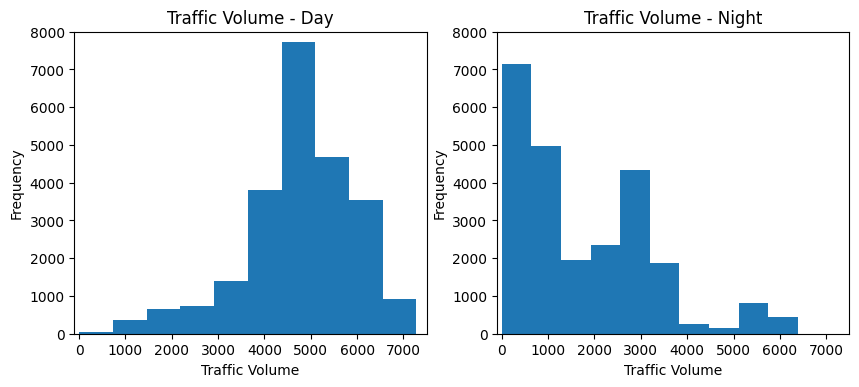

In [7]:
#plotting histogram for daytime traffic volume
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume - Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)

#plotting histogram for nighttime traffic volume
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume - Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.show()


In [8]:
#generating statistics for traffic volume during the day

day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
#generating statistics for traffic volume during the night

night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

__Daytime__


The histogram displaying the distribution of traffic volume values during the day is left skewed. This is indicative that most of the traffic volumes are high i.e. more than 4252 of the cars pass through the station in 75% of the time.

__Nithttime__


On the other hand, the histogram displaying the distribution of traffic volume values during the night is right skewed. Again, this is indicative that of the traffic volumes are low i.e. less than 2819 of the cars pass through the station in 75% of the time

__Conclusion__

From the data above, we can conclude that traffic is light during the night and heavy during the day. Our goal is to find the indicator of heavy traffic hence nighttime data will be irrelavant for analysis at this stage.

### Time Indicators

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of day

In [10]:
#finding average traffic volume for each month

day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

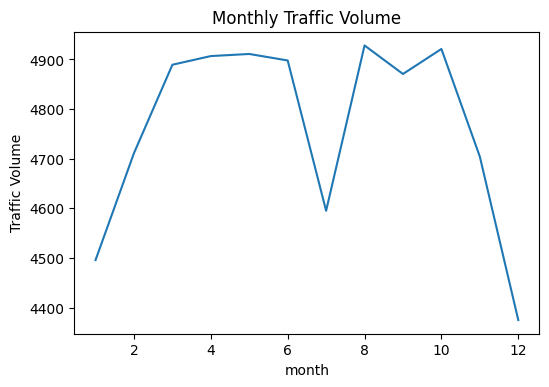

In [11]:
#generate a line plot to visualize change in traffic volume
#over month on average

by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('Monthly Traffic Volume')
plt.show()

The line graphs indicates that there is light traffic during cold seasons i.e. between November to February. On the flip side, there is heavy traffic during hot seasons i.e. between March to October. However, there is an exception in the month of July where we witness a sharp decline in traffic.

### Time Indicators (II)

We'll continue with building line plots for another time unit: day of the week.

In [12]:
#finding average traffic volume for each day of the week

day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

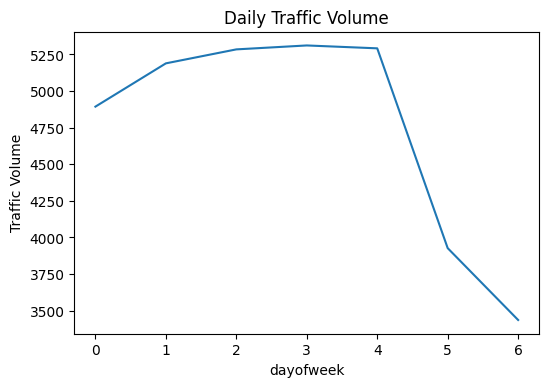

In [13]:
#generate a line plot to visualize change in traffic volume
#over day of the week.
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('Daily Traffic Volume')
plt.show()

The line plot indicates that traffic is heavier during business days i.e Monday-Friday with values over 5000 cars (except on Mondays). There is light traffic during the weekends with values below 4000 cars.

### Time Indicators (III)

In our daily traffic analysis, we found that traffic voulume is significantly heavier on business days compared to the weekends. We will now generate a line plot for the time of the day.

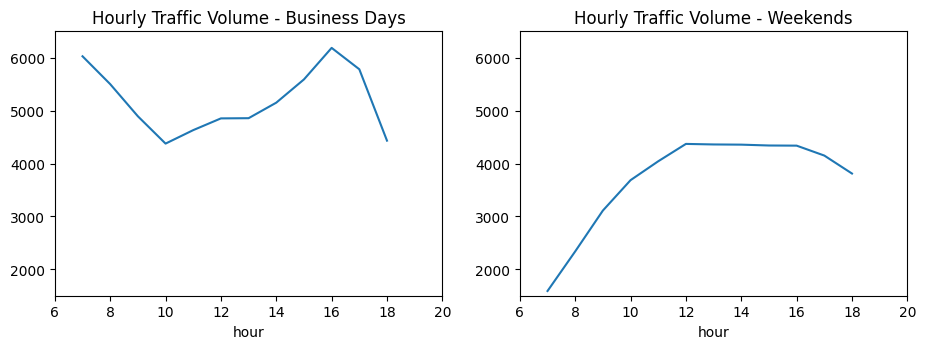

In [14]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] #4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5]#5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Hourly Traffic Volume - Business Days')
plt.xlim([6,20])
plt.ylim([1500,6500])
plt.xlabel('hour')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Hourly Traffic Volume - Weekends')
plt.xlim([6,20])
plt.ylim([1500,6500])
plt.xlabel('hour')
plt.show()


The hourly traffic volume indicates that traffic is generally heavy on business days than on weekends. To be precise heavy traffic is witnessed around 7 and around 16. The logic behind the values is that these are usually rush hours where people go to work and the time they come back home.

In summary, our time indicator vis-a-vis traffic volume shows that:

* The traffic is high during warm months compared to cold seasons
* The traffic is heavier during business days as compared to weekends
* The traffic is heavier during peak/rush hours (on business days) than any other time of the day.

### Weather Indicators

We've seen how time indicator contributes to heavy traffic. Another possible indicator of heavy traffic is weather. The dataset provides us with few useful columns about weather i.e `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [15]:
#Find the correlation values between traffic_volume
#and the numerical weather columns.

day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

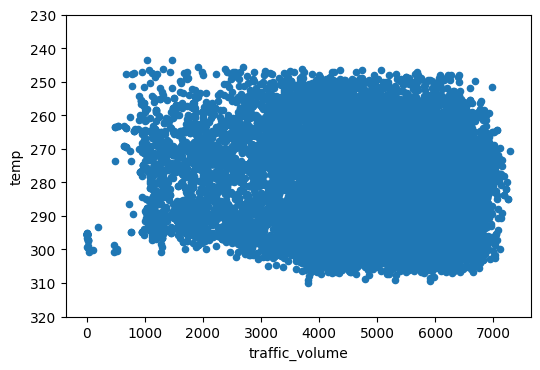

In [16]:
#Scatter plot for between temp and traffic volume variables

day.plot.scatter('traffic_volume', 'temp')
plt.ylim([320,230])
plt.show()

The numerical weather columns doesn't seem like reliable indicators for heavy traffic due to low degree of correlation with traffic volume. We will consider the other columns i.e. `weather_main` and `weather_description`

### Weather Types

To see if we can find more useful data, we'll look next at the categorical weather_related columns i.e. __weather_main__ and __weather_description__

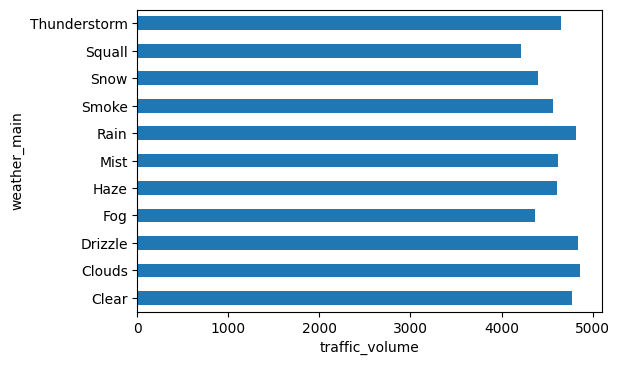

In [17]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('traffic_volume')
plt.show()

From the horizontal bar graph above, the indication is that there is no weather type with traffic volume of above 5,000 cars hence we cannot rely on this variable as an indicator of heavy traffic.

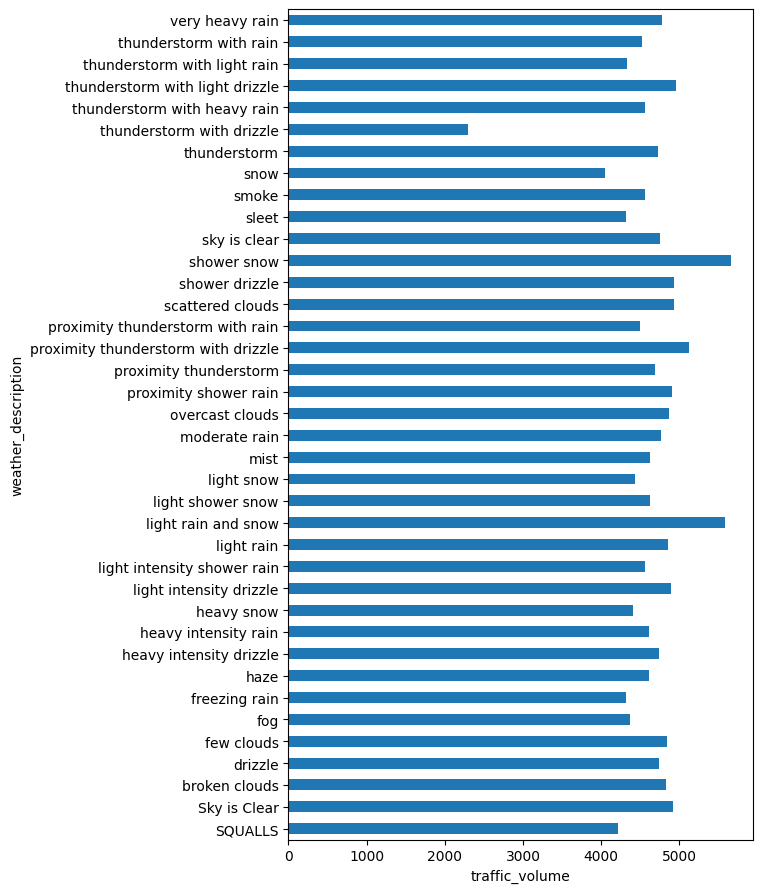

In [18]:
by_weather_description = day.groupby('weather_description').mean()

by_weather_description['traffic_volume'].plot.barh(figsize=(6,11))
plt.xlabel('traffic_volume')
plt.show()

From the horizontal bar graph above, the indication is that there are 3 weather types with traffic volume of above 5,000 cars. These weather types are; 

- shower snow
- light rain and snow
- proximity thunderstorm with drizzle

## Conclusion

The goal of our analysis was to determine a few indicators of heavy traffic on I-94 Interstate highway. We managed to find two major indicators;

1. Time Indicators

   - The traffic is high during warm months compared to cold seasons
   - The traffic is heavier during business days as compared to weekends
   - The traffic is heavier during peak/rush hours (on business days) than any other time of the day.

2. Weather Indicators

   - shower snow
   - light rain and snow
   - proximity thunderstorm with drizzle
   
With this information, frequent I-94 Interstate highway can make travelling decisions using time and weather indicators. They can choose to use other modes of transport during rush hours or in seasons where the weather is warm to avoid frustrations associated with heavy traffic. 